# Aula 02.02 - MBA em Ciência de Dados: Estatística descritiva

Francisco Aparecido Rodrigues, francisco@icmc.usp.br.<br>
Universidade de São Paulo, São Carlos, Brasil.<br>
Copyright (c) 2023.

Nesta aula, vamos mostrar como descrevemos os dados em termos de medidas de estatística. Medidas de posição, dispersão e correlação serão cobertas, com aplicações em diferentes conjuntos de dados.

## Medidas de posição

### Moda

Uma medida importante de tendência central é a moda, que retorna o elemento mais comum em um conjunto de dados. Geralmente, essa medida é usada para atributos nominais.<br> 
Vamos considerar um exemplo.

In [1]:
import numpy as np 
X = [0,1,1,2,2,2,3,3]
print('X:', X)

X: [0, 1, 1, 2, 2, 2, 3, 3]


Para calcularmos a moda, usamos o pacote Statistics:

In [2]:
from statistics import mode
m = mode(X)
print('A moda de X:', m)

A moda de X: 2


Podemos também identificar a moda visualmente em um gráfico de barras, que representa o valor mais frequente.

X: [0, 1, 1, 2, 2, 2, 3, 3]
Valores possíveis: [0 1 2 3]
Frequencia dos valores: [1. 2. 3. 2.]


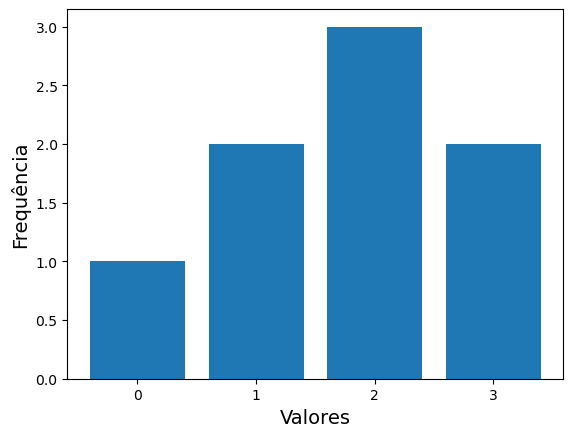

In [7]:
import matplotlib.pyplot as plt #biblioteca gráfica para mostrar os gráficos

# Usamos a funções sort e unique do Numpy para encontrar os valores 
# possíveis em ordem crescente.
# esses valores serão mostrados na abscissa do gráfico.
values = np.sort(np.unique(X)) 
# vamos calcular a frequência de cada valor presente na lista
freq = np.zeros(len(values)) # armazena as frequencias
ind = 0 # indice do vetor de frequências
for i in values: # para os valores diferentes
    counter = 0 # conta as ocorrências
    for j in range(0,len(X)):
        if(X[j] == i):
            counter = counter + 1
    freq[ind] = counter
    ind = ind + 1

print('X:',X)
print('Valores possíveis:', values)
print('Frequencia dos valores:', freq)

y_pos = np.arange(len(values))
plt.xticks(y_pos, values)
plt.bar(y_pos, freq)
plt.xlabel("Valores",fontsize = 14) 
plt.ylabel("Frequência", fontsize = 14) 


plt.show()

Podemos aplicar a função em dados nominais:

In [4]:
Y = ["red", "blue", "blue", "red", "green", "red", "red"]
print('A moda de Y:', mode(Y))

A moda de Y: red


O gráfico de barras mostrando a frequêbncia:

Y: ['red', 'blue', 'blue', 'red', 'green', 'red', 'red']
Valores possíveis: ['blue' 'green' 'red']
Frequencia dos valores: [2. 1. 4.]


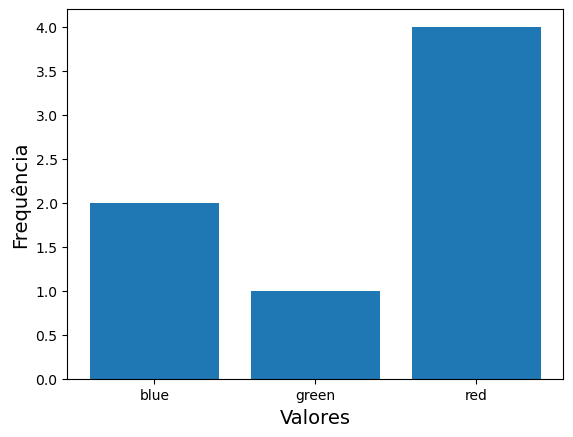

In [11]:
import matplotlib.pyplot as plt #biblioteca gráfica para mostrar os gráficos
values = np.sort(np.unique(Y)) #usamos a funções sort e unique do Numpy 
# para encontrar os valores possíveis.
# vamos calcular a frequência de cada valor presente na lista
freq = np.zeros(len(values)) # armazena as frequencias
ind = 0 # indice do vetor de frequências
for i in values: # para os valores diferentes
    counter = 0 # conta as ocorrências
    for j in range(0,len(Y)):
        if(Y[j] == i):
            counter = counter + 1
    freq[ind] = counter
    ind = ind + 1

print('Y:',Y)
print('Valores possíveis:', values)
print('Frequencia dos valores:', freq)

y_pos = np.arange(len(values))
plt.xticks(y_pos, values)
plt.bar(y_pos, freq)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Valores",fontsize = 14) 
plt.ylabel("Frequência", fontsize = 14) 
plt.show()

### Média e Mediana

A média e mediana são medidas de tendência central usadas para dados quantitativos. Assim, a média:

In [12]:
import numpy as np 
X = [1,1,1,2,2,3,4,5,5,5]
mx = np.mean(X)
print('X:', X)
print('A média:', mx)

X: [1, 1, 1, 2, 2, 3, 4, 5, 5, 5]
A média: 2.9


No caso da mediana:

In [13]:
md = np.median(X)
print('X:', X)
print('A mediana:', md)

X: [1, 1, 1, 2, 2, 3, 4, 5, 5, 5]
A mediana: 2.5


Se adicionarmos um valor extremo aos dados, vejamos como a média e a mediana se comportam:

In [14]:
X2 = [1,1,1,2,2,3,4,5,5,100]
print('X2:', X2)
print('A nova média:', np.mean(X2))
print('A nova mediana:', np.median(X2))

X2: [1, 1, 1, 2, 2, 3, 4, 5, 5, 100]
A nova média: 12.4
A nova mediana: 2.5


Ou seja, a média é altamente sensível a valores extremos, enquanto que a mediana é mais robusta.

Vamos considerar uma distribuição de probabilidades. Os dados são gerados a partir de distribuições normal e exponencial.

Para a distribuição normal, a média é indicada pela linha contínua e a mediana, pela tracejada.

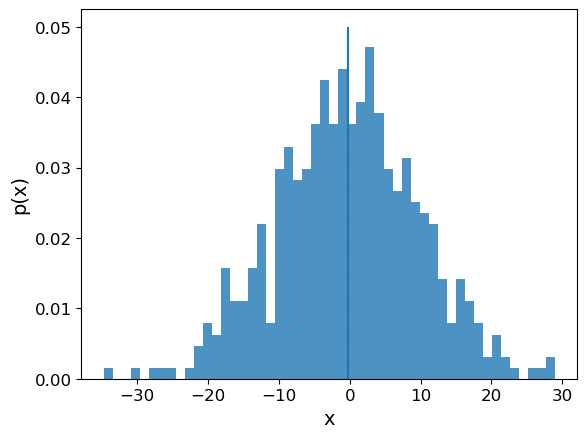

In [16]:
import numpy as np
import matplotlib.pyplot as plt #biblioteca gráfica para mostrar os gráficos

mu = 0 # Média da distribuicao normal
sigma = 10 #desvio padrão da distribuição normal
Y = np.random.normal(mu, sigma, 500)
plt.hist(Y, density=True, bins=50,lw=0,alpha=.8)

m = np.mean(Y)
md = np.median(Y)
plt.vlines(m,0,0.05)
plt.vlines(md,0,0.05, linestyles = 'dashed')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("x",fontsize = 14) 
plt.ylabel("p(x)", fontsize = 14) 
plt.show(True)

Para a distribuição exponencial, a média é indicada pela linha contínua e a mediana, pela tracejada.

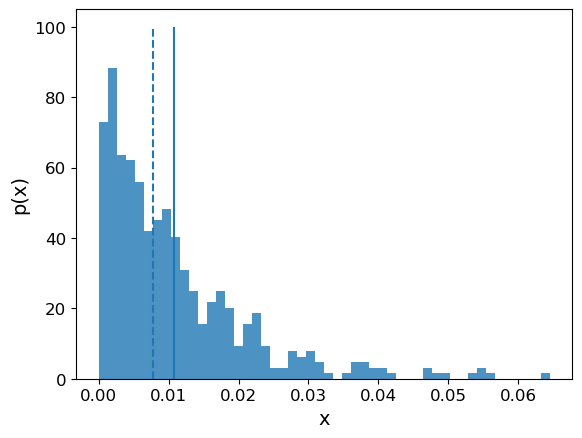

In [18]:
import numpy as np
import matplotlib.pyplot as plt #biblioteca gráfica para mostrar os gráficos

lbda = 100 # taxa da distribuição exponencial
beta = 1.0/lbda

Y = np.random.exponential(beta, 500)
plt.hist(Y, density=True, bins=50,lw=0,alpha=.8)

m = np.mean(Y)
md = np.median(Y)
plt.vlines(m,0,lbda)
plt.vlines(md,0,lbda, linestyles = 'dashed')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("x",fontsize = 14) 
plt.ylabel("p(x)", fontsize = 14) 

plt.show(True)

Notamos que a média é similar à mediana se a distribuição é praticamente simétrica em relação à média. Caso a distribuição não seja simétrica, o mais adequado é usar a mediana como medida central.

## Medidas de dispersão

As medidas de dispersão mais usadas são a variância e o desvio padrão. A distância interquantil (IQR) também é bastante usada e quantifica a diferença entre o terceiro e primeiro quantil. Já a amplitude simplesmente mede a diferença entre os valores máximo e mínimo.

In [19]:
from scipy.stats import iqr

def variancia(X):
    m = np.mean(X)
    N = len(X)
    s = 0
    for i in np.arange(0, len(X)):
        s = s + (X[i]-m)**2
    s = s/(N-1)
    return s

X = [0,0,1,1,18]
Y = [4, 4, 4, 4, 4]
mx = np.mean(X)
my = np.mean(Y)
print('X:', X)
print('Média de X:', mx)
print('Variância de X:', variancia(X))
print('IQR de X:', iqr(X))
print('Amplitude de X:', np.max(X)-np.min(X))

print('\n')
print('Y:', Y)
print('Média de Y:', my)
print('Variância de Y:', variancia(Y))
print('IQR de Y:', iqr(Y))
print('Amplitude de Y:', np.max(Y)-np.min(Y))

X: [0, 0, 1, 1, 18]
Média de X: 4.0
Variância de X: 61.5
IQR de X: 1.0
Amplitude de X: 18


Y: [4, 4, 4, 4, 4]
Média de Y: 4.0
Variância de Y: 0.0
IQR de Y: 0.0
Amplitude de Y: 0


Notem que os dados acima possuem a mesma média, mas a variância é bastante diferente.

## Correlação

Vamos considerar alguns casos para vermos como se comporta o coeficiente de correlação de Pearson de acordo com diferentes tendências entre as variáveis $X$ e $Y$.

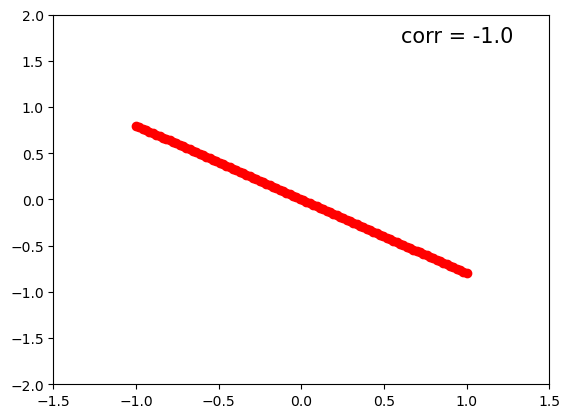

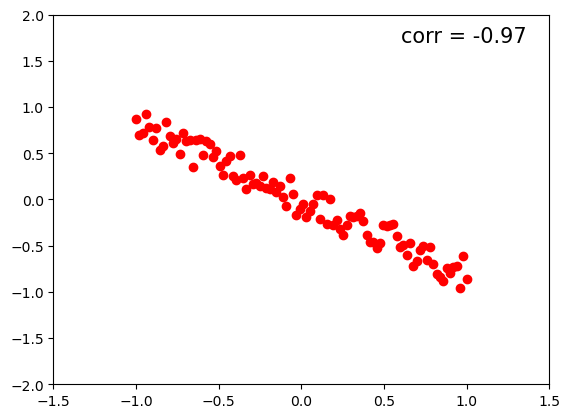

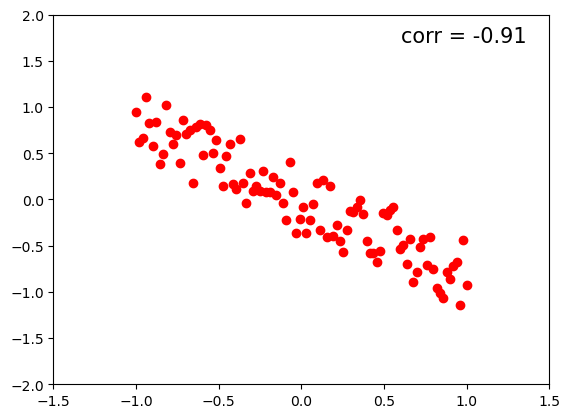

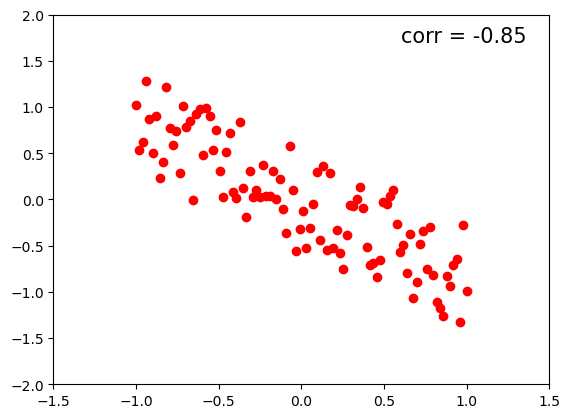

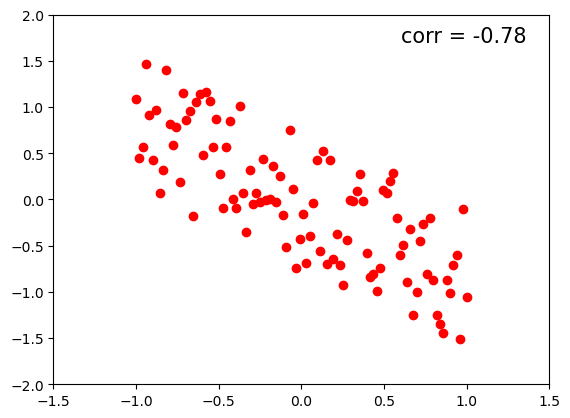

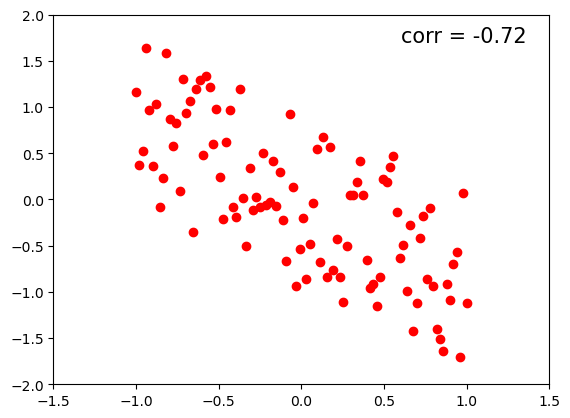

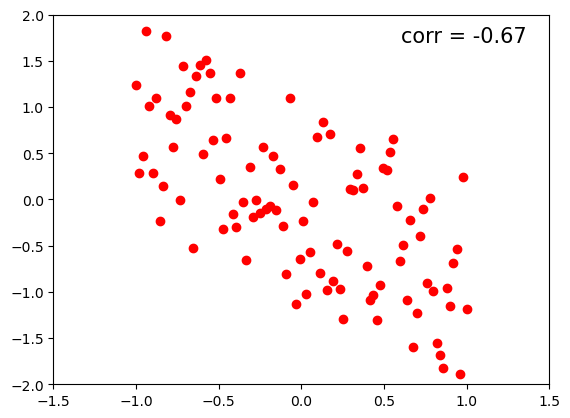

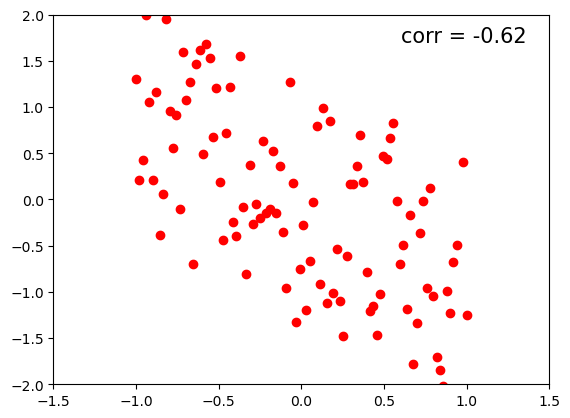

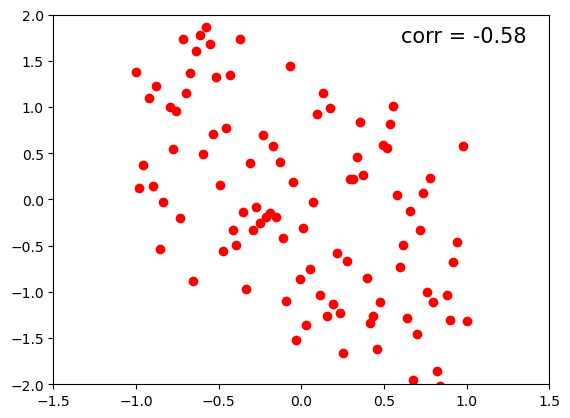

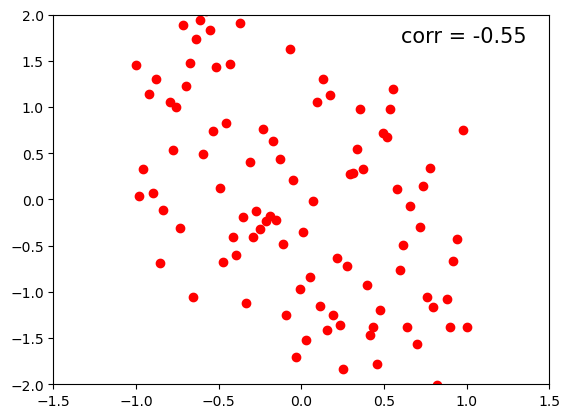

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

N = 100
X = np.linspace(-1,1, N)
erro = np.random.uniform(-1,1,N) # ruído a ser incluído na relação linear.
for sigma in np.arange(0,2,0.2):
    Y = -0.8*X + erro*sigma
    plt.plot(X,Y, 'ro')
    corr, p_value = pearsonr(X, Y) # calcula a correlação
    corr = int(corr*100)/100
    string = 'corr = '+ str(corr)
    plt.xlim(-1.5,1.5)
    plt.ylim(-2, 2)
    plt.text(0.6,1.7, string, fontsize=15)
    plt.show(True)

A medida de correlação é importante para analisar a relação entre as variáveis. Se duas variáveis são altamente correlacionadas, é adequado remover uma delas, de modo a reduzir informação redundante nos dados.

Vamos considerar a base de dados da flor Iris:

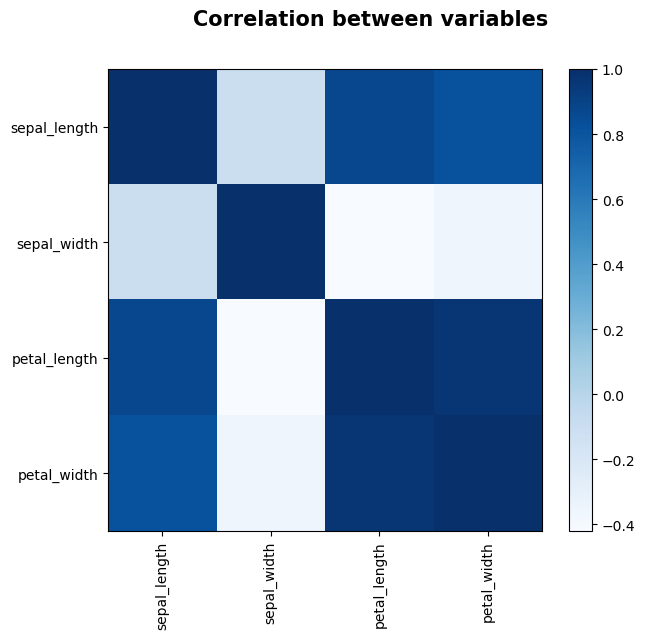

In [23]:
import pandas as pd # biblioteca pandas
data = pd.read_csv('data/iris.csv', header=(0)) # lê os dados a partir do arquivo
data = data.drop(columns='species') # comando acrescentado. colunas com strings causam erro. 

corr = data.corr()
#Plot Correlation Matrix using Matplotlib
plt.figure(figsize=(7, 6))
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

In [25]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Podemos mostrar a mesma tabela usando a biblioteca Searborn:

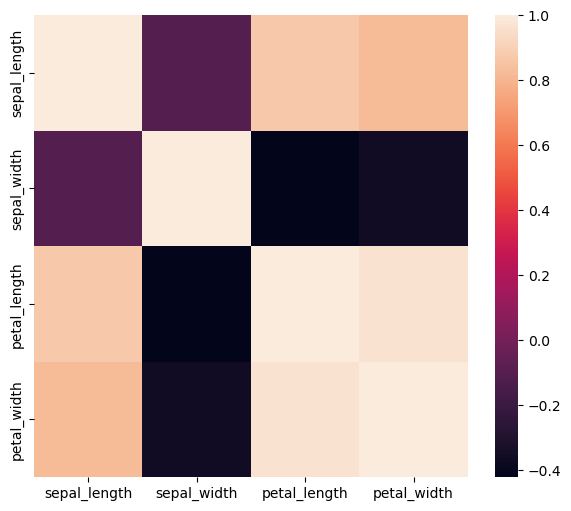

In [26]:
import seaborn as sns
plt.figure(figsize= (7, 6))
sns.heatmap(data.corr())
plt.show(sns)

Para obtermos um resumo das medidas estatística dos dados:

In [27]:
data.describe() 

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Além do coeficiente de Pearson, podemos considerar o coeficiente de correlação de Spearman:

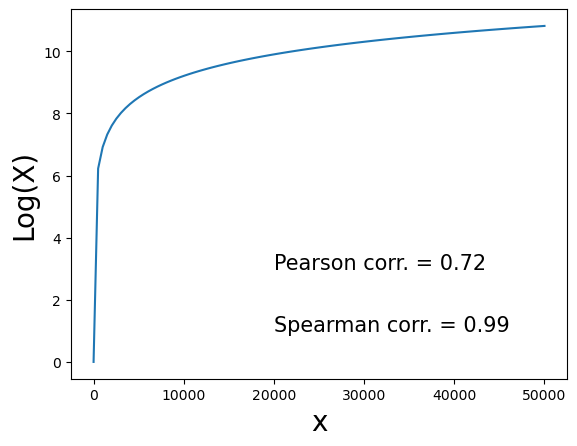

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

N = 100
x = np.linspace(1, 50000, N) 
z = np.log(x)

plt.plot(x, z) 
plt.xlabel("x",fontsize = 20) 
plt.ylabel("Log(X)", fontsize = 20) 
corr, p_value = pearsonr(x, z)
corrs, p_values = spearmanr(x, z)
corr = int(corr*100)/100
corrs = int(corrs*100)/100
string = 'Pearson corr. = '+ str(corr)
plt.text(20000,3, string, fontsize=15)
string = 'Spearman corr. = '+ str(corrs)
plt.text(20000,1, string, fontsize=15)
plt.show()

Notem que nesse caso, os coeficientes de Spearman e Pearson são diferentes. Veja o material da aula teórica.

### Medidas de Entropia

A entropia de Shannon para um dado de N lados:

In [29]:
from scipy.stats import entropy
N = 6
Px = np.ones(N)*1/N
H = entropy(Px, base=2) 
print("Entropia de Shannon: ", H)

Entropia de Shannon:  2.584962500721156


Notem que essa entropia é máxima, visto que a distribuição uniforme é a que oferece maior informação e maior dificuldade na previsao. Para um vetor com um único valor, a entropia é mínima (ou seja, um dado com faces iguais).
Vejam o exemplo abaixo para uma moeda cujas probabilidade de sair cara e coroa variam. Modifique os valores e veja o que acontece com a entropia.

In [30]:
from scipy.stats import entropy
Px = [1, 0] # probabilidade de sair cara e coroa
H = entropy(Px, base=2) 
print("Entropia de Shannon: ", H)

Px = [0.75, 0.25] # a soma dos elementos do vetor deve ser igual a 1.
H = entropy(Px, base=2) 
print("Entropia de Shannon: ", H)

Px = [0.5, 0.5]
H = entropy(Px, base=2) 
print("Entropia de Shannon: ", H)

Entropia de Shannon:  0.0
Entropia de Shannon:  0.8112781244591328
Entropia de Shannon:  1.0


Entropia de relativa (divergência de Kulback-Leibler) pode ser usada para comparar distribuições.

In [31]:
from scipy.stats import entropy
P = [0.25,0.55,0.2]
Q = [0.33, 0.33, 0.33]

print('KL(P,Q) = ', entropy(P,Q, base = np.exp(1)))
print('KL(Q,P) = ', entropy(Q,P, base = np.exp(1)))

KL(P,Q) =  0.10134076548572565
KL(Q,P) =  0.09924413610176086


Se as distribuições forem iguais.

In [32]:
print('KL(P,P) = ', entropy(P,P, base = np.exp(1)))
print('KL(Q,Q) = ', entropy(Q,Q, base = np.exp(1)))

KL(P,P) =  0.0
KL(Q,Q) =  0.0


In [33]:
from scipy.stats import entropy
P = [0.15,0.25,0.2]
Q = [0.3, 0.6, 0.1]

print('KL(P,Q) = ', entropy(P,Q, base = np.exp(1)))
print('KL(Q,P) = ', entropy(Q,P, base = np.exp(1)))

KL(P,Q) =  0.20380924824852756
KL(Q,P) =  0.15308505475833867


In [34]:
from scipy.stats import entropy
import numpy as np
P = [0.15,0.25,0.2]
Q = [0.3, 0.6, 0.1]

print('KL(P,Q) = ', entropy(P,Q, base = np.exp(1)))
print('KL(Q,P) = ', entropy(Q,P, base = np.exp(1)))

KL(P,Q) =  0.20380924824852756
KL(Q,P) =  0.15308505475833867


## Exercícios de fixação

Não é necessário entregar os exercícios abaixo, mas é importante resolvê-los para fixar os conteúdos estudados.

1 -  Considere uma moeda cuja probabilidade de sair cara é $p$. Monte um gráfico da entropia em função do valor de $p$.

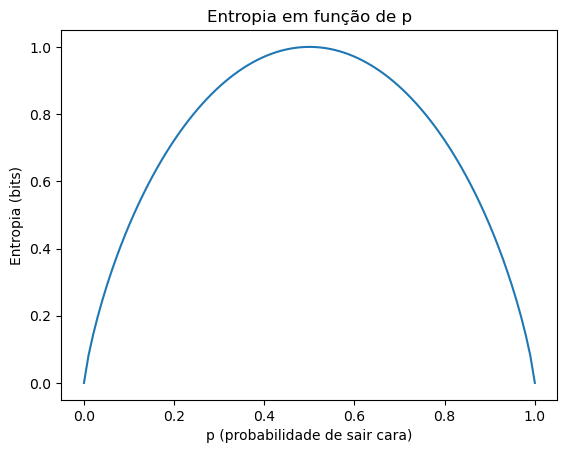

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import math

def entropy(p):
    if p == 0 or p == 1:
        return 0
    return -p * math.log2(p) - (1 - p) * math.log2(1 - p)

p = np.linspace(0, 1, num=100)
entropy_values = [entropy(p_i) for p_i in p]

plt.plot(p, entropy_values)
plt.xlabel("p (probabilidade de sair cara)")
plt.ylabel("Entropia (bits)")
plt.title("Entropia em função de p")
plt.show()

>A entropia é uma medida de incerteza ou impureza em probabilidade e informação. Em termos simples, a entropia mede a quantidade de incerteza associada a uma distribuição de probabilidade.

>Na teoria da informação, a entropia é usada para medir a quantidade média de informação em uma mensagem ou sinal. A entropia de uma distribuição de probabilidade é uma medida da quantidade de informação que precisamos conhecer para identificar o resultado de um evento aleatório.

>A entropia é frequentemente usada em diversas áreas, incluindo compressão de dados, codificação de informação, aprendizado de máquina e análise de sinal.

2 - Gere dados a partir de uma distribuição de Poisson. Calcula a média e variância e compare seus valores.

Média:  5.0131
Variância:  5.04172839


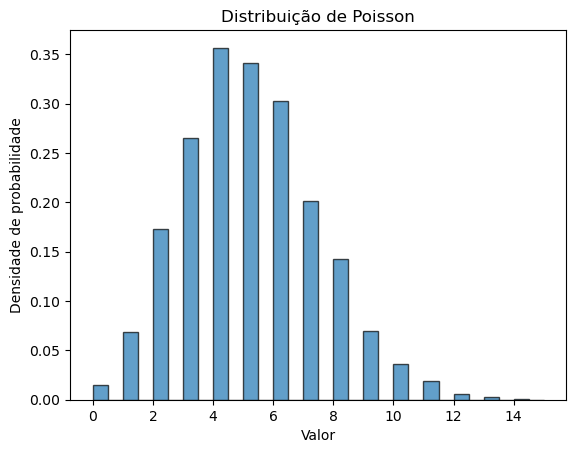

CPU times: user 123 ms, sys: 133 ms, total: 256 ms
Wall time: 100 ms


In [36]:
%%time
import numpy as np
import matplotlib.pyplot as plt

# Parâmetro da distribuição de Poisson
lambd = 5

# Gerar dados a partir de uma distribuição de Poisson
data = np.random.poisson(lam=lambd, size=10000)

# Calcular a média dos dados
mean = np.mean(data)

# Calcular a variância dos dados
variance = np.var(data)

# Exibir resultados
print("Média: ", mean)
print("Variância: ", variance)

# Plotar histograma dos dados
plt.hist(data, bins=30, density=True, edgecolor='black', alpha=0.7)
plt.xlabel("Valor")
plt.ylabel("Densidade de probabilidade")
plt.title("Distribuição de Poisson")
plt.show()

>A média e a variância da distribuição de Poisson são dadas por λ, o parâmetro da distribuição. Neste caso, λ é igual a 5, então a média e a variância esperadas são iguais a 5. O código acima gera 10000 amostras da distribuição de Poisson com λ igual a 5, calcula a média e a variância dos dados gerados e exibe seus valores. Além disso, o código plota um histograma dos dados gerados para visualizar a distribuição.

>Você deve ver que a média e a variância calculadas são aproximadamente iguais a 5, o que confirma a relação média = variância = λ da distribuição de Poisson.

>Na distribuição de Poisson, a média e a variância são ambas iguais a λ, que no caso é igual a 5. Portanto, na distribuição de Poisson com λ = 5, a média e a variância esperadas são ambas iguais a 5.

>De forma matemática, se X é uma variável aleatória com distribuição de Poisson com parâmetro λ, então E(X) = λ e Var(X) = λ. Logo, para λ = 5, temos E(X) = 5 e Var(X) = 5.

>A média e a variância estimadas a partir dos dados gerados aleatoriamente podem não ser exatamente iguais ao parâmetro da distribuição de Poisson (λ = 5), mesmo que a distribuição dos dados seja de fato uma distribuição de Poisson. Isso ocorre porque a amostra gerada é apenas uma pequena parte dos dados teóricos que seriam gerados pela distribuição de Poisson.

>A média e a variância estimadas a partir da amostra serão apenas uma aproximação das verdadeiras média e variância da distribuição de Poisson, e quanto maior a amostra, mais próximas serão desses valores teóricos. Em outras palavras, ao aumentarmos o tamanho da amostra, a estimativa da média e da variância converge para os valores teóricos.

3 - Calcula e a divergência de Kullback-Leibler entre as distribuições normal e Poisson. Gerem os dados com mesma média e variância.

In [37]:
import numpy as np
import scipy.stats as st

# Parâmetros da distribuição normal
mean = 5
std = np.sqrt(mean)

# Parâmetros da distribuição de Poisson
lambd = mean

# Gerar dados a partir de uma distribuição normal
normal_data = np.random.normal(loc=mean, scale=std, size=1000)

# Gerar dados a partir de uma distribuição de Poisson
poisson_data = np.random.poisson(lam=lambd, size=1000)

# Cálculo da DKL
dkl = np.sum(st.norm.logpdf(normal_data, loc=mean, scale=std) -
             st.poisson.logpmf(poisson_data, mu=lambd))

# Exibir resultados
print("Divergência de Kullback-Leibler: ", dkl)

Divergência de Kullback-Leibler:  -13.5819225995896


>A divergência de Kullback-Leibler (DKL) mede a diferença entre duas distribuições de probabilidade. Neste caso, a DKL é calculada entre as distribuições normal e Poisson com a mesma média e variância. O código acima gera 1000 amostras de cada distribuição, calcula a DKL entre as duas distribuições e exibe seu valor.

>Você deve ver que a DKL não é zero, o que indica que as duas distribuições não são idênticas. Isso é esperado, pois as distribuições normal e Poisson são distintas, apesar de terem a mesma média e variância.

4 - Calcula e a divergência de Kullback-Leibler entre as distribuições Binomial e Poisson. Gerem os dados com mesma média e variância.

In [38]:
import numpy as np
import scipy.stats as st

# Parâmetros da distribuição Binomial
n = 10
p = 0.5
mean = n * p
var = n * p * (1 - p)

# Parâmetros da distribuição de Poisson
lambd = mean

# Gerar dados a partir de uma distribuição Binomial
binomial_data = np.random.binomial(n=n, p=p, size=1000)

# Gerar dados a partir de uma distribuição de Poisson
poisson_data = np.random.poisson(lam=lambd, size=1000)

# Cálculo da DKL
dkl = np.sum(st.binom.logpmf(binomial_data, n=n, p=p) -
             st.poisson.logpmf(poisson_data, mu=lambd))

# Exibir resultados
print("Divergência de Kullback-Leibler: ", dkl)

Divergência de Kullback-Leibler:  297.1383506548563


>A divergência de Kullback-Leibler (DKL) mede a diferença entre duas distribuições de probabilidade. Neste caso, a DKL é calculada entre as distribuições Binomial e Poisson com a mesma média e variância. O código acima gera 1000 amostras de cada distribuição, calcula a DKL entre as duas distribuições e exibe seu valor.

>Você deve ver que a DKL não é zero, o que indica que as duas distribuições não são idênticas. Isso é esperado, pois as distribuições Binomial e Poisson são distintas, apesar de terem a mesma média e variância.

5 - Para a função log(), investigue como as correlações de Pearson e Spearman variam de acordo com o intervalo dos dados.

>A correlação de Pearson é uma medida da relação linear entre duas variáveis, enquanto a correlação de Spearman é uma medida da relação monotônica entre duas variáveis. A função logarítmica afeta as correlações de Pearson e Spearman de diferentes maneiras, dependendo do intervalo de dados.

>Se os dados estiverem no intervalo (0, infinito), a função logarítmica é estritamente crescente e não afetará a correlação de Spearman. No entanto, a correlação de Pearson pode ser afetada, pois a função logarítmica pode suavizar ou amplificar a relação linear entre as variáveis.

>Se os dados estiverem no intervalo (1, infinito), a função logarítmica é estritamente crescente e ambas as correlações de Pearson e Spearman não serão afetadas.

>Se os dados estiverem no intervalo (-infinito, 0) ou no intervalo (-infinito, 1), a função logarítmica é estritamente decrescente e afetará ambas as correlações de Pearson e Spearman. A correlação de Pearson será invertida (se a relação linear entre as variáveis for positiva, a correlação de Pearson será negativa, e vice-versa), e a correlação de Spearman será invertida se a relação monotônica for positiva, mas não será afetada se a relação monotônica for negativa.

>Em resumo, o impacto da função logarítmica na correlação de Pearson e Spearman depende do intervalo de dados. Em geral, é importante ter cuidado ao aplicar transformações aos dados, pois elas podem afetar as correlações e distorcer a análise de dados.

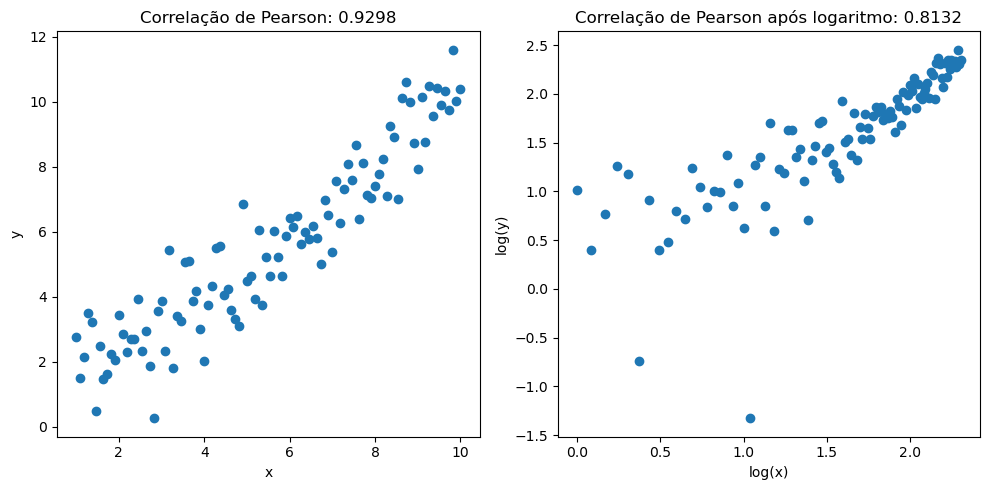

Correlação de Spearman antes do logaritmo: 0.9364416441644163
Correlação de Spearman após o logaritmo: 0.9364416441644163


In [39]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

np.random.seed(0)

# Gera dados com correlação positiva
x = np.linspace(1, 10, 100)
y = x + np.random.normal(0, 1, 100)

# Calcula correlação de Pearson
pearson_corr, _ = stats.pearsonr(x, y)

# Calcula correlação de Spearman
spearman_corr, _ = stats.spearmanr(x, y)

# Aplica logaritmo aos dados
x_log = np.log(x)
y_log = np.log(y)

# Calcula correlação de Pearson após logaritmo
pearson_corr_log, _ = stats.pearsonr(x_log, y_log)

# Calcula correlação de Spearman após logaritmo
spearman_corr_log, _ = stats.spearmanr(x_log, y_log)

# Plota dados antes e após logaritmo
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(x, y)
axs[0].set_title(f"Correlação de Pearson: {pearson_corr:.4f}")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[1].scatter(x_log, y_log)
axs[1].set_title(f"Correlação de Pearson após logaritmo: {pearson_corr_log:.4f}")
axs[1].set_xlabel("log(x)")
axs[1].set_ylabel("log(y)")
plt.tight_layout()
plt.show()

print("Correlação de Spearman antes do logaritmo:", spearman_corr)
print("Correlação de Spearman após o logaritmo:", spearman_corr_log)


>Este exemplo gera dois gráficos, um antes e outro após a aplicação da função logarítmica aos dados. Os valores de correlação de Pearson e Spearman são calculados antes e depois da aplicação da função logarítmica e impressos na tela para fins de comparação. O resultado mostra que, após a aplicação da função logarítmica, a correlação de Pearson é suavizada enquanto a correlação de Spearman não é afetada.

>Além disso, é importante notar que a correlação de Spearman é baseada na classificação dos dados, e a ordem relativa dos dados não é afetada pelo logaritmo. Portanto, a correlação de Spearman antes e depois do logaritmo deve ser rigorosamente a mesma.